In [245]:
import pandas as pd
df=pd.read_csv('/home/user9/Rainier_weather_climbs (1).csv_2023-05-16_11-14-42_00000000')

In [246]:
type(df)

pandas.core.frame.DataFrame

In [247]:
df.head()

,18-Jun-11,6/18/11,2011,6,Disappointment Cleaver,33,52,0.6346153846153846,0.27,0,177,37,Unnamed: 12
0,18-Jun-11,6/18/11,2011.0,6.0,Emmons-Winthrop,10,22,0.454545,0.27,0.0,177.0,37.0,NaN
1,18-Jun-11,6/18/11,2011.0,6.0,Liberty Ridge,3,5,0.600000,0.27,0.0,177.0,37.0,NaN
2,18-Jun-11,6/18/11,2011.0,6.0,Kautz Glacier,0,2,0.000000,0.27,0.0,177.0,37.0,NaN
3,18-Jun-11,6/18/11,2011.0,6.0,Tahoma Glacier,0,2,0.000000,0.27,0.0,177.0,37.0,NaN
4,22-Aug-08,8/22/08,2008.0,8.0,Emmons-Winthrop,6,19,0.315789,0.70,0.0,0.0,48.0,NaN


In [248]:
columns = ["Date","Date1","Year","Month","Route","Sum_summit","Sum_size","Success_rate",
           "Merged_precipitation","Merged_snowfall","Snow_depth","Temp_observed","Fog"]

In [249]:
df.columns = columns
df.shape

(5028, 13)

In [250]:
df = df.fillna(0)
df = df[df.Year != 0]
df.head()

,Date,Date1,Year,Month,Route,Sum_summit,Sum_size,Success_rate,Merged_precipitation,Merged_snowfall,Snow_depth,Temp_observed,Fog
0,18-Jun-11,6/18/11,2011.0,6.0,Emmons-Winthrop,10,22,0.454545,0.27,0.0,177.0,37.0,0.0
1,18-Jun-11,6/18/11,2011.0,6.0,Liberty Ridge,3,5,0.600000,0.27,0.0,177.0,37.0,0.0
2,18-Jun-11,6/18/11,2011.0,6.0,Kautz Glacier,0,2,0.000000,0.27,0.0,177.0,37.0,0.0
3,18-Jun-11,6/18/11,2011.0,6.0,Tahoma Glacier,0,2,0.000000,0.27,0.0,177.0,37.0,0.0
4,22-Aug-08,8/22/08,2008.0,8.0,Emmons-Winthrop,6,19,0.315789,0.70,0.0,0.0,48.0,0.0


In [251]:
df.shape

(4684, 13)

In [252]:
df["Date"] = pd.to_datetime(df["Date"],format = '%d-%b-%y')

In [253]:
df["Date1"] = pd.to_datetime(df["Date"],format = '%m/%d/%y')

In [254]:
df["Year"] = df['Year'].astype(int)
df["Month"] = df['Month'].astype(int)

In [255]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4684 entries, 0 to 5027
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  4684 non-null   datetime64[ns]
 1   Date1                 4684 non-null   datetime64[ns]
 2   Year                  4684 non-null   int64         
 3   Month                 4684 non-null   int64         
 4   Route                 4684 non-null   object        
 5   Sum_summit            4684 non-null   int64         
 6   Sum_size              4684 non-null   int64         
 7   Success_rate          4684 non-null   float64       
 8   Merged_precipitation  4684 non-null   float64       
 9   Merged_snowfall       4684 non-null   float64       
 10  Snow_depth            4684 non-null   float64       
 11  Temp_observed         4684 non-null   float64       
 12  Fog                   4684 non-null   float64       
dtypes: datetime64[ns](

#### Temp and Snow_depth analysis on Year and month

In [256]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import os

In [257]:
pivot = df.pivot_table(index = "Month",columns="Year",values = "Temp_observed",aggfunc="mean")
pivot

Year,2006,2007,2008,2009,2010,2011,2012,2013,2015
Month,,,,,,,,,
1,25.833333,28.000000,23.666667,41.900000,35.000000,33.000000,35.000000,37.500000,43.444444
2,20.461538,20.000000,34.750000,30.916667,29.411765,23.818182,30.307692,28.545455,32.750000
3,26.052632,31.000000,24.800000,26.500000,36.473684,18.888889,26.727273,30.300000,41.545455
4,39.466667,23.428571,33.684211,33.538462,31.214286,26.863636,33.100000,27.500000,25.777778
5,37.910448,47.021978,21.795699,46.016667,37.000000,28.275000,35.020408,33.866667,22.034884
6,47.217647,41.940397,26.888000,28.301887,39.038168,25.387879,38.524590,43.398551,22.787879
7,51.953846,51.449438,29.635593,47.242424,55.543478,44.830986,50.736434,51.151515,54.204301
8,52.202381,35.458824,42.449275,45.678571,53.905263,48.130000,53.777778,51.861111,51.322581
9,48.954545,43.549020,20.534884,50.058824,46.787879,53.658537,36.222222,46.448276,41.833333


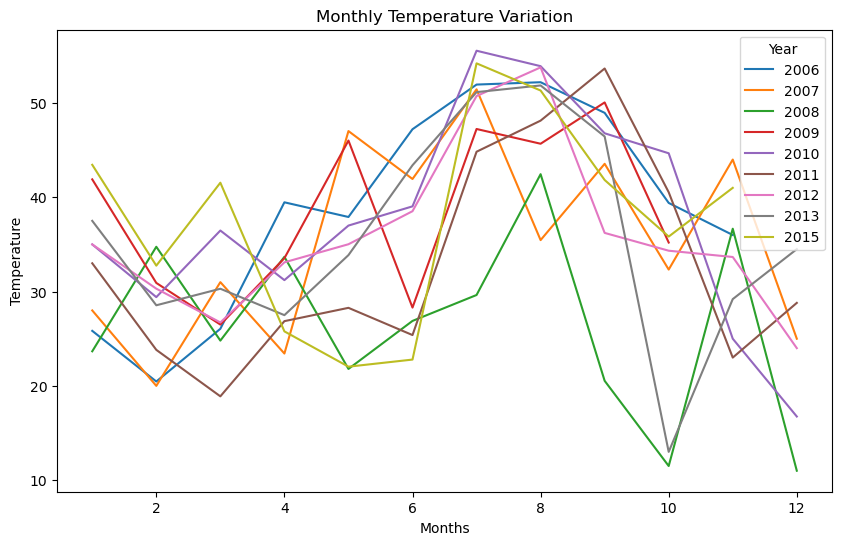

In [258]:
pivot.plot(figsize=(10,6),title="Monthly Temperature Variation")
plt.xlabel("Months")
plt.ylabel("Temperature")
plt.show()

In [259]:
pivot = df.pivot_table(index = "Month",columns="Year",values = "Snow_depth",aggfunc="mean")
pivot

Year,2006,2007,2008,2009,2010,2011,2012,2013,2015
Month,,,,,,,,,
1,114.333333,110.000000,139.333333,78.900000,88.000000,111.000000,75.333333,120.100000,59.111111
2,163.923077,179.000000,165.000000,108.416667,110.352941,128.454545,129.538462,145.818182,59.500000
3,198.421053,142.500000,209.333333,144.400000,128.421053,157.777778,201.454545,172.000000,64.909091
4,184.933333,100.857143,228.578947,169.730769,153.142857,226.727273,203.233333,188.071429,48.666667
5,140.134328,117.351648,78.462366,149.591667,144.218750,222.275000,172.316327,141.026667,18.325581
6,73.794118,61.152318,91.232000,47.716981,102.389313,145.200000,123.942623,92.340580,0.000000
7,6.869231,3.842697,33.169492,11.242424,32.673913,105.042254,49.728682,16.310606,0.000000
8,0.000000,0.000000,2.101449,0.000000,0.000000,27.970000,0.000000,0.000000,0.000000
9,0.000000,0.039216,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


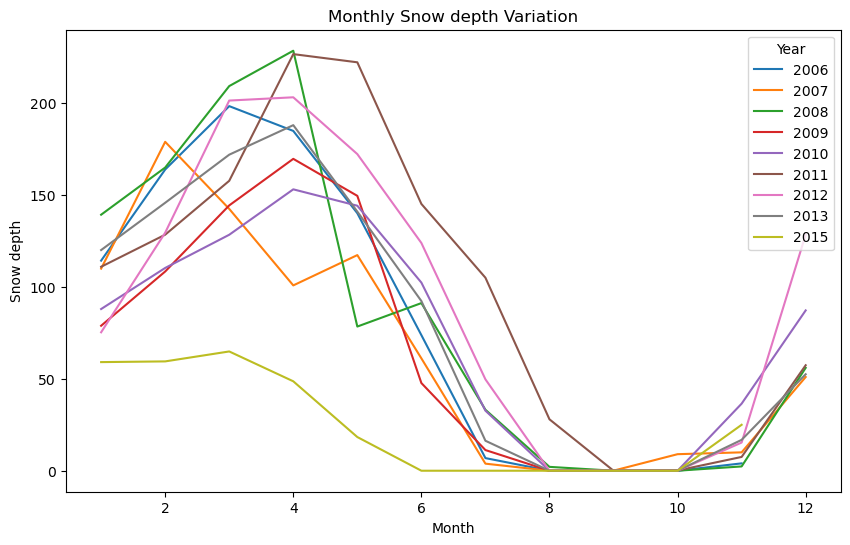

In [260]:
pivot.plot(figsize=(10,6),title="Monthly Snow depth Variation")
plt.ylabel("Snow depth")
plt.show()

### Success Rate Analysis on Year and month

In [261]:
pivot = df.pivot_table(index = "Month",columns="Year",values = ["Sum_summit"],aggfunc="sum")
pivot

Sum_summit                                                          \
Year        2006    2007    2008    2009    2010    2011    2012    2013   
Month                                                                      
1            0.0     2.0     3.0     3.0     7.0     0.0     0.0    23.0   
2            1.0     0.0     1.0     4.0    11.0    20.0    20.0     0.0   
3            0.0     2.0     2.0    19.0     0.0     0.0     0.0    18.0   
4           20.0    29.0    11.0    23.0     2.0    15.0    16.0     9.0   
5           88.0   397.0   339.0   564.0   144.0    57.0   255.0   161.0   
6         1510.0   980.0  1202.0  1498.0   754.0   970.0   440.0  1096.0   
7         2210.0  1212.0  2249.0   692.0  2413.0  1949.0  2140.0  2241.0   
8         1485.0  1162.0  1257.0   790.0  1316.0  1687.0  1489.0  1035.0   
9          469.0   415.0   594.0   128.0   206.0   502.0   505.0   193.0   
10           2.0     0.0     0.0     0.0     2.0     0.0     0.0     0.0   
11           0.0     0.0     0.0     NaN     0.0     0.0     0.0     2.0   
12           NaN     0.0     0.0     8.0     0.0     0.0     0.0     0.0   

               
Year     2015  
Month          
1         8.0  
2         3.0  
3         2.0  
4        19.0  
5       398.0  
6      1801.0  
7      1626.0  
8       884.0  
9       126.0  
10        0.0  
11        0.0  
12        NaN

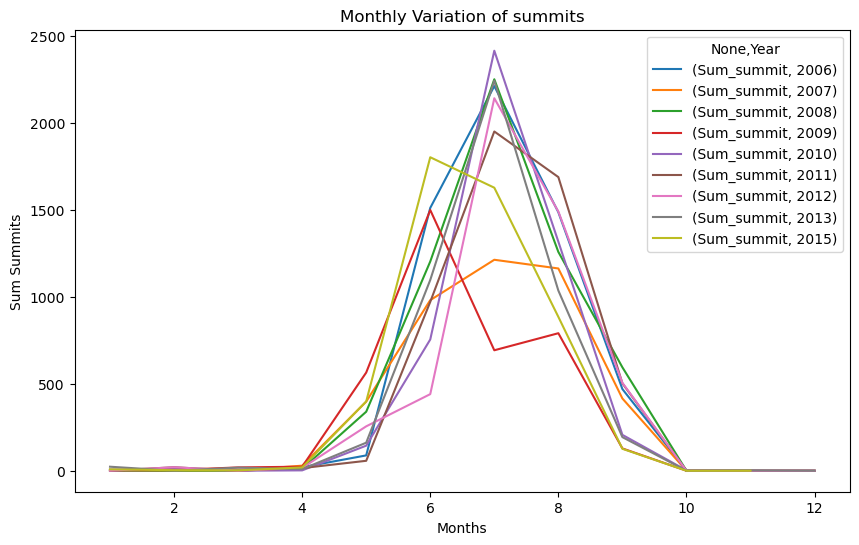

In [262]:
pivot.plot(figsize=(10,6),title="Monthly Variation of summits")
plt.xlabel("Months")
plt.ylabel("Sum Summits")
plt.show()

### Analysis of Success_rate and summit based on the top 5 routes

In [263]:
df['Route'] = df['Route'].str.replace('·', ' ')
df[df.Success_rate !=0].Route.value_counts()[:5]

Disappointment Cleaver    971
Emmons-Winthrop           599
Kautz Glacier             310
Liberty Ridge             182
Little Tahoma             120
Name: Route, dtype: int64

In [264]:
list_top_Routes_success = dict(df[df.Success_rate !=0].Route.value_counts()[:5]).keys()
df_new = df[df.Route.isin(list_top_Routes_success)]

In [265]:
pivot = df_new.pivot_table(index = "Year",columns="Route",values = ["Sum_summit"],aggfunc="sum")
pivot

Sum_summit                                              \
Route Disappointment Cleaver Emmons-Winthrop Kautz Glacier Liberty Ridge   
Year                                                                       
2006                    4114             959           197            97   
2007                    2739             753           218            85   
2008                    4175             980           227            48   
2009                    2277             632           213            89   
2010                    2698            1008           216            75   
2011                    3415             990           266            84   
2012                    3510             790           173            78   
2013                    3358             869           186            84   
2015                    3666             791           267            32   

                     
Route Little Tahoma  
Year                 
2006             77  
2007             59  
2008             46  
2009             53  
2010             58  
2011             82  
2012             76  
2013             70  
2015             56

In [266]:
pivot2 = df.pivot_table(index = "Year",columns="Route",values = ["Sum_summit"],aggfunc="sum")
pivot2

Sum_summit                                                       \
Route CAMP MUIR ONLY Circumnavigation Curtis Ridge Disappointment Cleaver   
Year                                                                        
2006             NaN              0.0          NaN                 4114.0   
2007             NaN              NaN          0.0                 2739.0   
2008             NaN              NaN          0.0                 4175.0   
2009             0.0              NaN          0.0                 2277.0   
2010             NaN              NaN          NaN                 2698.0   
2011             NaN              NaN          NaN                 3415.0   
2012             NaN              NaN          NaN                 3510.0   
2013             NaN              NaN          NaN                 3358.0   
2015             NaN              NaN          2.0                 3666.0   

                                                                      \
Route Disappointment Cleaver Direct Edmonds Headwall Emmons-Winthrop   
Year                                                                   
2006                            NaN              NaN           959.0   
2007                            3.0              NaN           753.0   
2008                            NaN              NaN           980.0   
2009                            NaN              0.0           632.0   
2010                            NaN              NaN          1008.0   
2011                            NaN              NaN           990.0   
2012                            NaN              NaN           790.0   
2013                            NaN              NaN           869.0   
2015                            NaN              NaN           791.0   

                                                     ...                 \
Route Fuhrer's Finger Fuhrer's Thumb Fuhrers Finger  ... Succss Couloir   
Year                                                 ...                  
2006             81.0            NaN            NaN  ...            NaN   
2007             38.0            0.0            NaN  ...            2.0   
2008             50.0            NaN            NaN  ...            NaN   
2009             96.0            NaN            NaN  ...            NaN   
2010             57.0            NaN            NaN  ...            NaN   
2011             47.0            NaN            NaN  ...            NaN   
2012             36.0            NaN            NaN  ...            NaN   
2013             59.0            NaN            NaN  ...            NaN   
2015              0.0            NaN            9.0  ...            NaN   

                                                                      \
Route Sunset Amphitheater Sunset Ridge Tahoma Cleaver Tahoma Glacier   
Year                                                                   
2006                  2.0          4.0            2.0           31.0   
2007                  NaN          0.0            3.0            6.0   
2008                  0.0          0.0            5.0            6.0   
2009                  2.0          0.0            3.0           15.0   
2010                  NaN          2.0            0.0            7.0   
2011                  NaN          2.0            NaN            0.0   
2012                  0.0          6.0            NaN            0.0   
2013                  3.0          0.0            NaN            9.0   
2015                  NaN          0.0            3.0            4.0   

                                                    \
Route Willis Wall Wilson Headwall circumnavigation   
Year                                                 
2006          2.0             3.0              NaN   
2007          NaN             3.0              NaN   
2008          NaN             4.0              0.0   
2009          NaN             2.0              NaN   
2010          NaN             3.0              NaN   
2011          0.0     

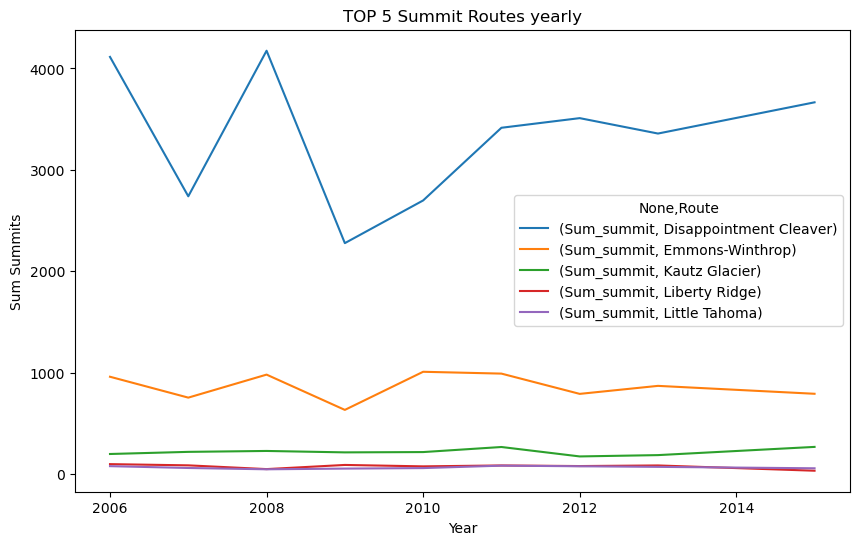

In [267]:
pivot.plot(figsize=(10,6),title="TOP 5 Summit Routes yearly")
plt.xlabel("Year")
plt.ylabel("Sum Summits")
plt.show()

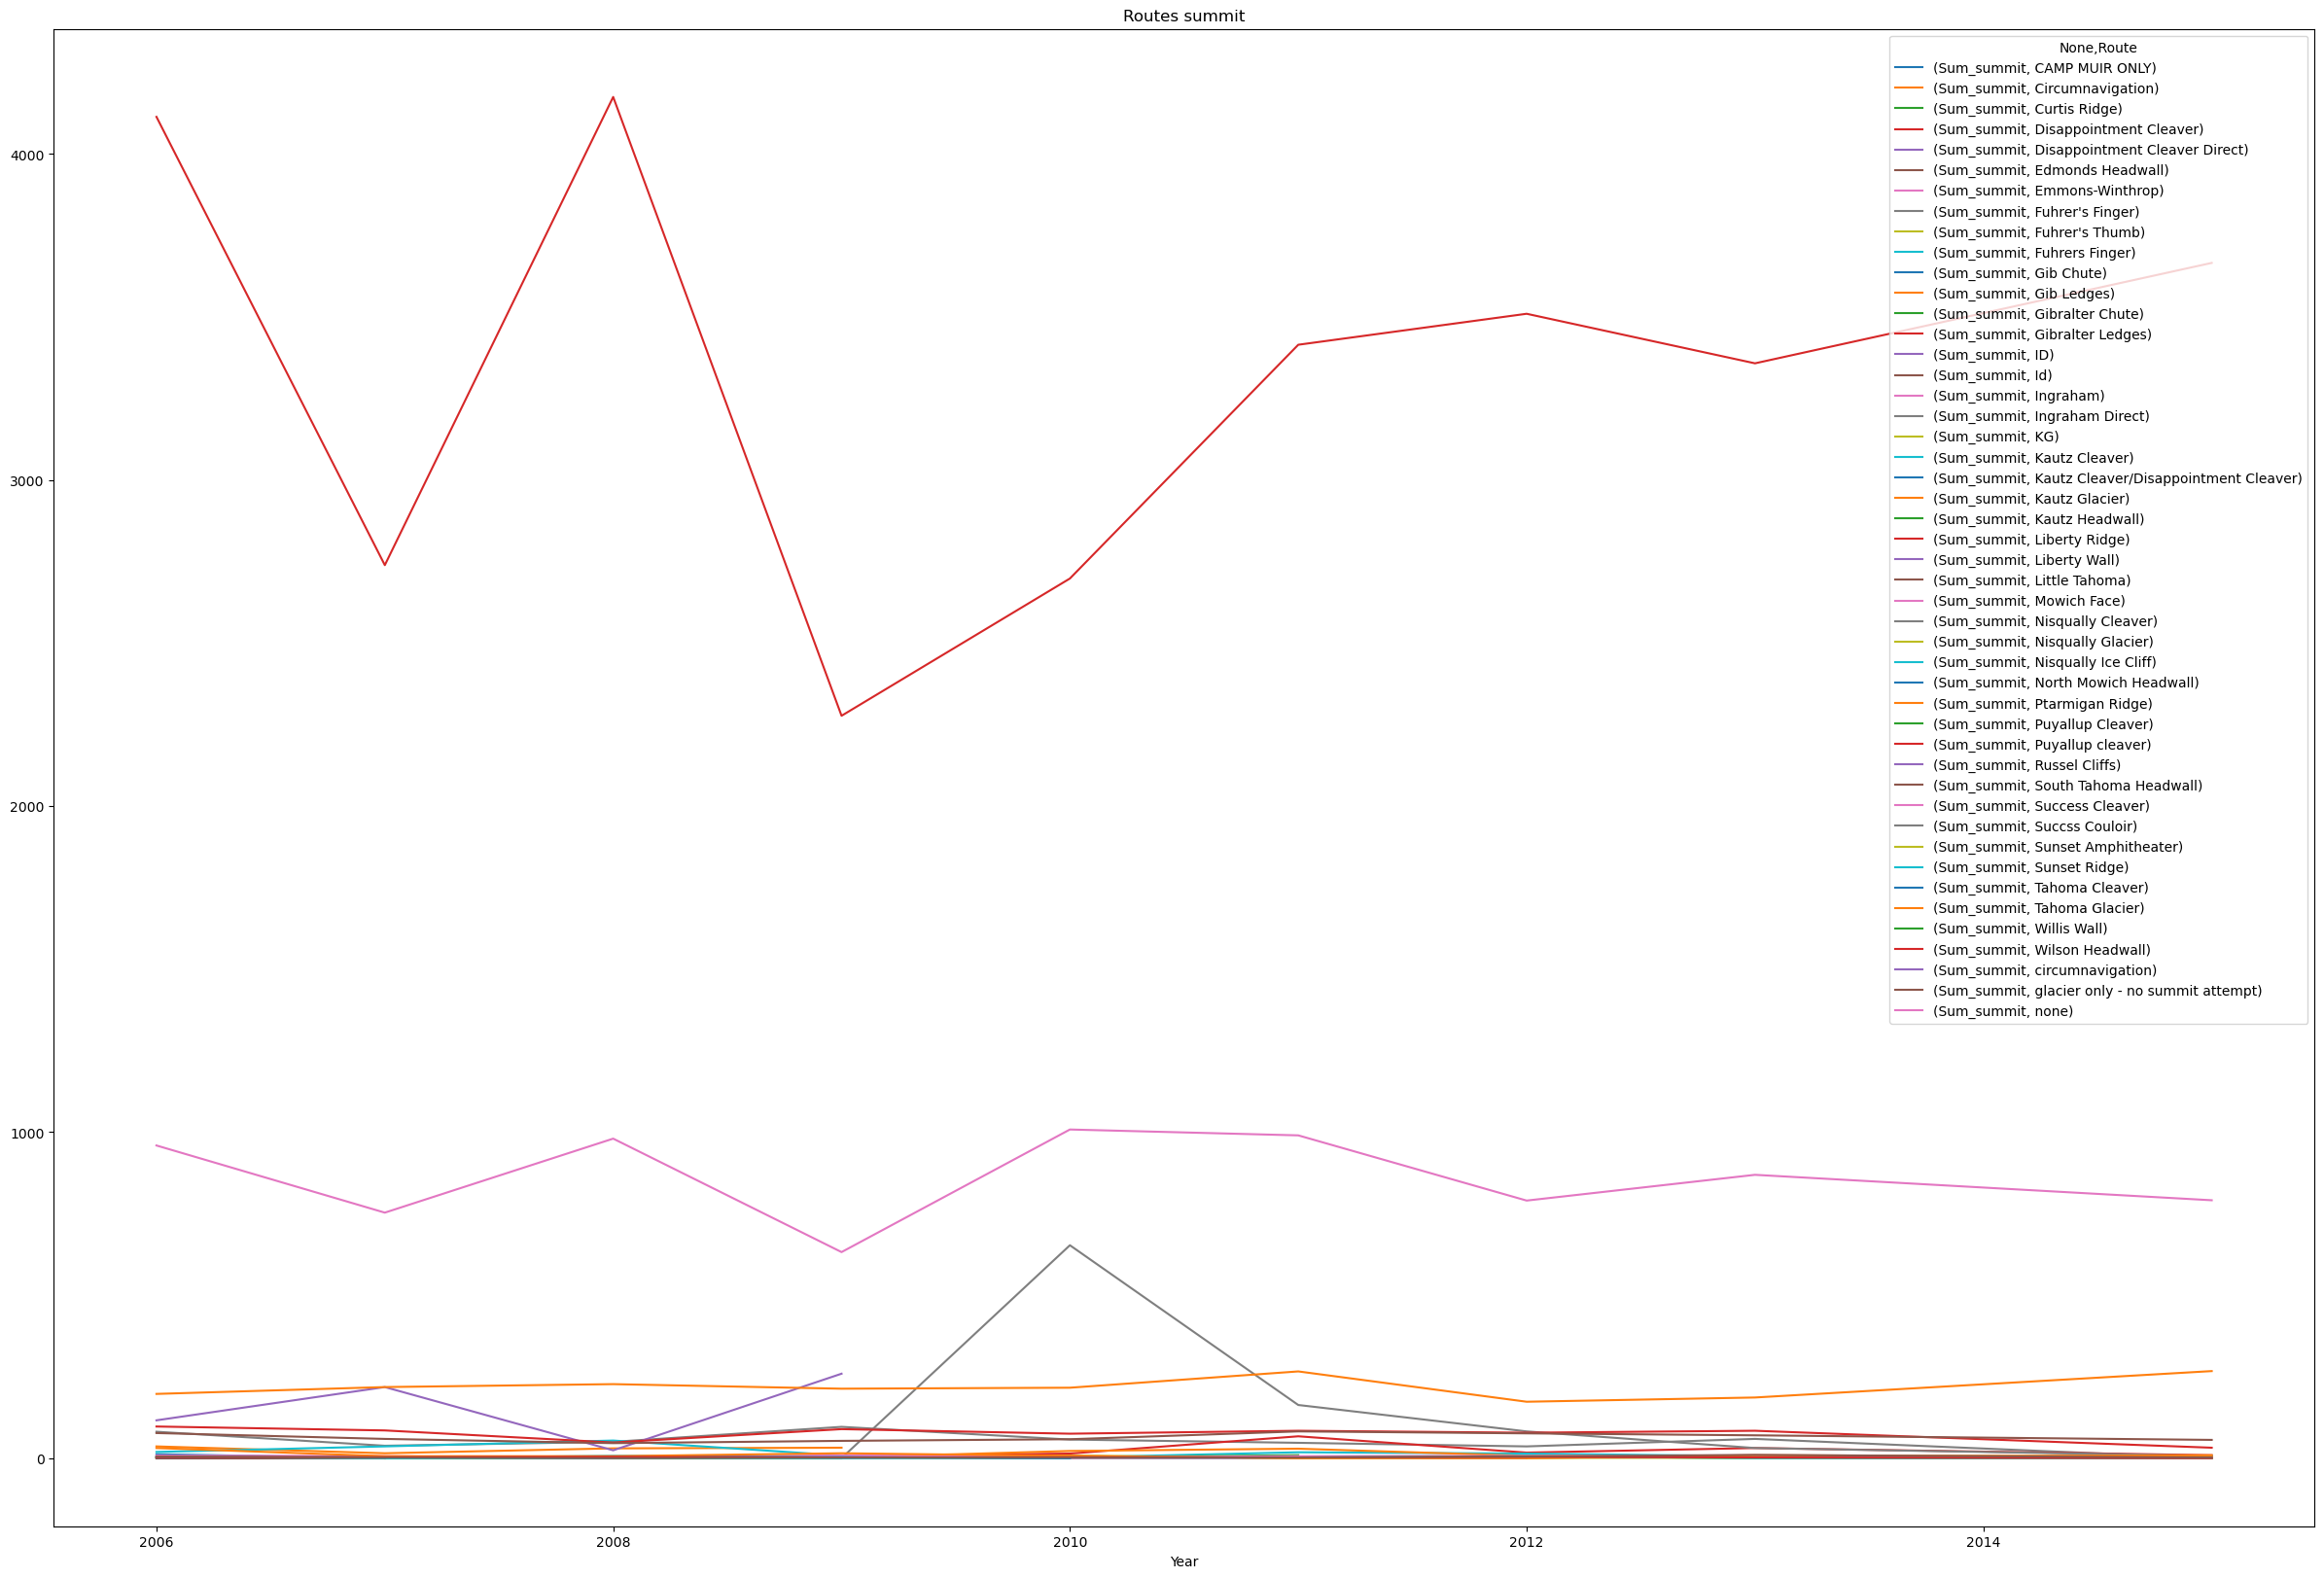

In [268]:
pivot2.plot(figsize=(30,20),title="Routes summit")
plt.show()

###  Correlation of different parameters on our ML model

In [269]:
num_feats = [
  'Snow_depth', 
  'Temp_observed',
  'Merged_precipitation', 
  'Merged_snowfall']

cat_feats = [
    'Route',"Month"
]

df_new = df.copy()

In [270]:
feats = num_feats+cat_feats
feats

['Snow_depth',
 'Temp_observed',
 'Merged_precipitation',
 'Merged_snowfall',
 'Route',
 'Month']

In [271]:
df_new.corr()

,Year,Month,Sum_summit,Sum_size,Success_rate,Merged_precipitation,Merged_snowfall,Snow_depth,Temp_observed,Fog
Year,1.000000,-0.024143,0.001170,0.057016,-0.096962,0.004227,-0.006649,-0.042573,-0.042181,-0.189573
Month,-0.024143,1.000000,0.210351,0.206225,0.166303,-0.154289,-0.255247,-0.631698,0.230061,0.037850
Sum_summit,0.001170,0.210351,1.000000,0.895792,0.404535,-0.131380,-0.110602,-0.258031,0.140279,0.005384
Sum_size,0.057016,0.206225,0.895792,1.000000,0.195475,-0.079763,-0.088558,-0.229704,0.114287,-0.004764
Success_rate,-0.096962,0.166303,0.404535,0.195475,1.000000,-0.171508,-0.153947,-0.208563,0.145934,0.056510
Merged_precipitation,0.004227,-0.154289,-0.131380,-0.079763,-0.171508,1.000000,0.664170,0.240985,-0.130328,0.049310
Merged_snowfall,-0.006649,-0.255247,-0.110602,-0.088558,-0.153947,0.664170,1.000000,0.295772,-0.148075,-0.007236
Snow_depth,-0.042573,-0.631698,-0.258031,-0.229704,-0.208563,0.240985,0.295772,1.000000,-0.074727,-0.021877
Temp_observed,-0.042181,0.230061,0.140279,0.114287,0.145934,-0.130328,-0.148075,-0.074727,1.000000,-0.006904
Fog,-0.189573,0.037850,0.005384,-0.004764,0.056510,0.049310,-0.007236,-0.021877,-0.006904,1.000000


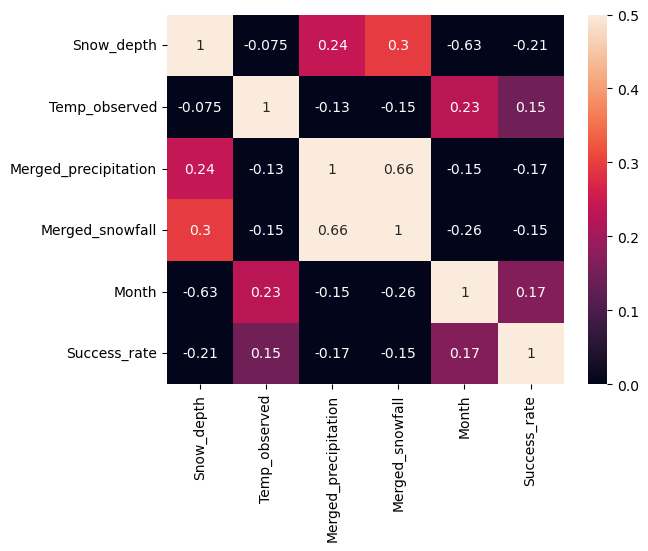

In [272]:
import matplotlib.pyplot as mp
import pandas as pd
import seaborn as sb
  
dataplot = sb.heatmap(df_new[feats+["Success_rate"]].corr(),vmin=0, vmax=0.5, annot=True)

mp.show()

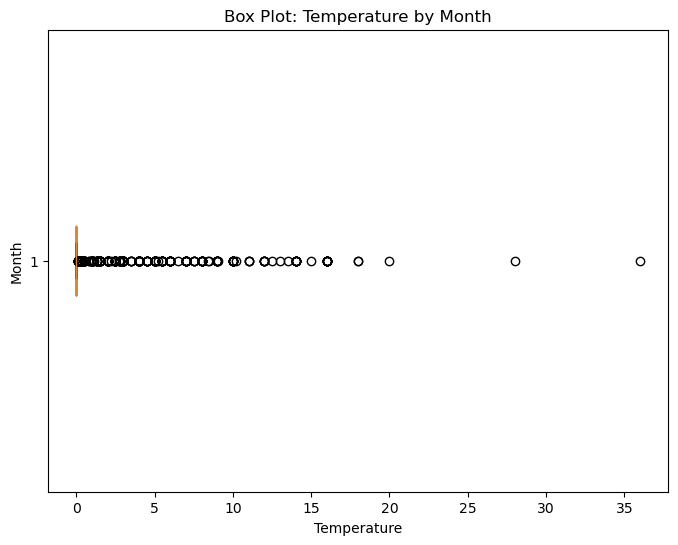

In [273]:
plt.figure(figsize=(8, 6))
plt.boxplot(df['Merged_snowfall'], vert=False)

# Set plot labels and title
plt.xlabel('Temperature')
plt.ylabel('Month')
plt.title('Box Plot: Temperature by Month')

# Display the plot
plt.show()

# 'Merged_precipitation',
#  'Merged_snowfall',

(array([4.508e+03, 1.050e+02, 3.500e+01, 1.900e+01, 1.200e+01, 3.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([ 0. ,  3.6,  7.2, 10.8, 14.4, 18. , 21.6, 25.2, 28.8, 32.4, 36. ]),
 <BarContainer object of 10 artists>)

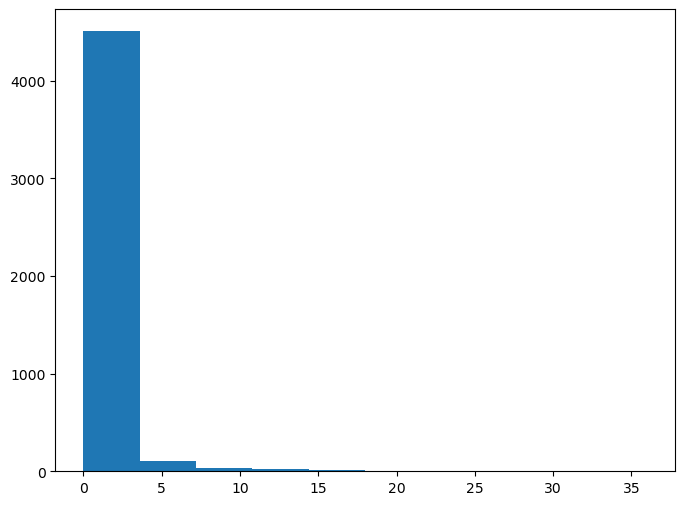

In [274]:
plt.figure(figsize=(8, 6))
plt.hist(df['Merged_snowfall'], bins=10)

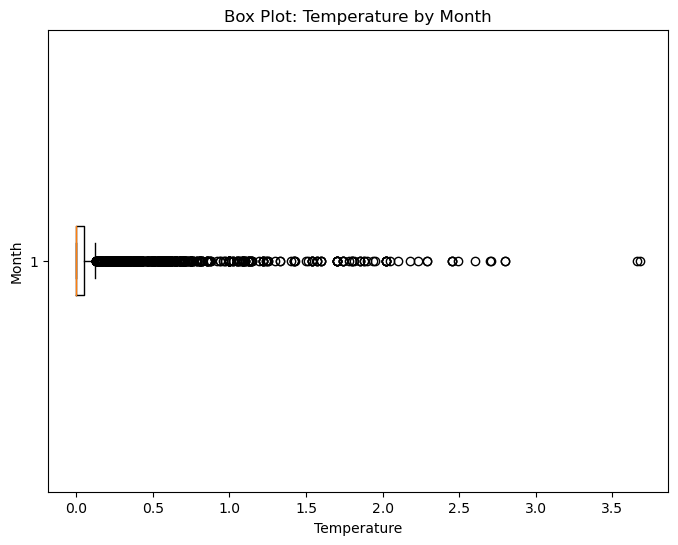

In [275]:
plt.figure(figsize=(8, 6))
plt.boxplot(df['Merged_precipitation'], vert=False)

# Set plot labels and title
plt.xlabel('Temperature')
plt.ylabel('Month')
plt.title('Box Plot: Temperature by Month')

# Display the plot
plt.show()

# 'Merged_precipitation',
#  'Merged_snowfall',

(array([4.196e+03, 3.110e+02, 8.600e+01, 3.100e+01, 2.900e+01, 1.700e+01,
        7.000e+00, 5.000e+00, 0.000e+00, 2.000e+00]),
 array([0.   , 0.368, 0.736, 1.104, 1.472, 1.84 , 2.208, 2.576, 2.944,
        3.312, 3.68 ]),
 <BarContainer object of 10 artists>)

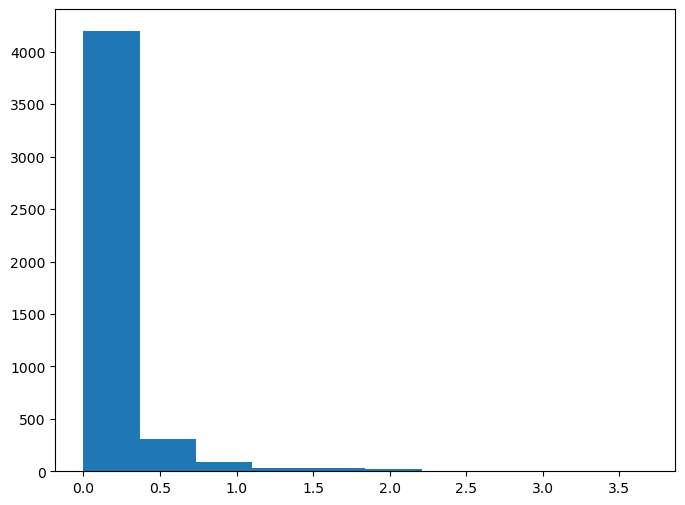

In [276]:
plt.figure(figsize=(8, 6))
plt.hist(df['Merged_precipitation'], bins=10)

(array([1952.,   90.,  124.,  158.,  189.,  401.,  340.,  300.,  242.,
         888.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

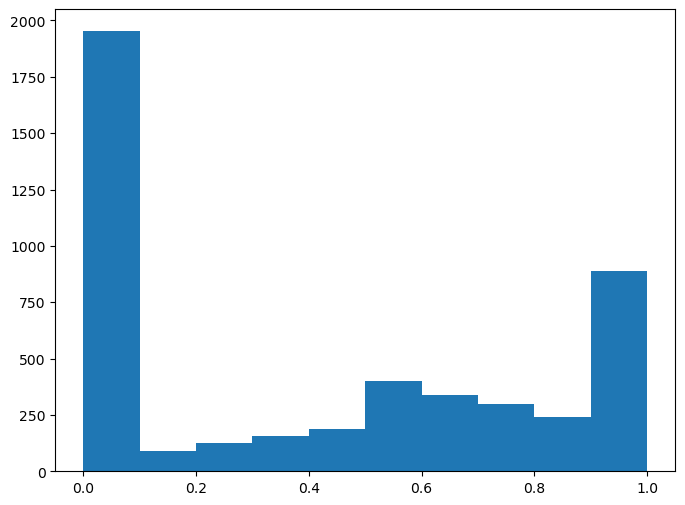

In [277]:
plt.figure(figsize=(8, 6))
plt.hist(df['Success_rate'], bins=10)